# <font color=#B40404>--------------------- Results of the Cosinor analysis ---------------------</font>

# Table of Contents

* [Importation of the data considering p-values and q-values ](#importation_data)
* [Number of significative periodic models for a 0.05 threshold](#nb_rhythmic_proteins_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_pval)
    * [Considering q-values](#nb_rhythmic_proteins_qval)
* [Number of significative periodic models for a range of thresholds](#nb_rhythmic_proteins_range_threshold)
    * [Considering p-values](#nb_rhythmic_proteins_range_threshold_pval)
    * [Considering q-values](#nb_rhythmic_proteins_range_threshold_qval)

In [2]:
import pandas as pd
import numpy as np
import copy
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.cbook import get_sample_data
import json
import pickle as pkl
import random
import os

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning) # cosinorPy uses soon-to-be deprecated method pd.append...

# Importation of the data considering p-values and q-values <a class="anchor" id="importation_data"></a>

In [15]:
rhythm_period_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_pval.csv")
rhythm_period_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_pval.csv")
rhythm_period_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_qval.csv")
rhythm_period_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_qval.csv")

sum_pval = rhythm_period_mass_spec_pval+rhythm_period_rna_seq_pval
sum_qval = rhythm_period_mass_spec_qval+rhythm_period_rna_seq_qval

# Number of significative periodic models for a 0.05 threshold  <a class="anchor" id="nb_rhythmic_proteins_threshold"></a>

## Number of signifivative periodic models considering <font color=#B40404>p-values </font> <a class="anchor" id="nb_rhythmic_proteins_pval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.


In [33]:
rhythm_period_pval = pd.DataFrame({'Period': rhythm_period_mass_spec_pval["Period"],
                                   'nb_prots_ctrl': sum_pval["nb_prots_ctrl"],
                                   'nb_prots_nlrp3':sum_pval["nb_prots_nlrp3"]})
print(rhythm_period_pval.sort_values(by ="nb_prots_ctrl"))

    Period  nb_prots_ctrl  nb_prots_nlrp3
0       10           2641             862
1       11           2863             876
2       12           4109            1057
3       13           5938            1206
4       14           7369            1345
17      27           8201            3605
16      26           8213            3552
18      28           8214            3715
15      25           8255            3487
5       15           8328            1487
14      24           8336            3437
13      23           8424            3350
12      22           8555            3266
11      21           8684            3179
10      20           8805            3050
6       16           8817            1849
9       19           8922            2885
7       17           8976            2242
8       18           8978            2628


Histogram of the significative periodic models for the CTRL group and considering p-values

<Figure size 640x480 with 0 Axes>

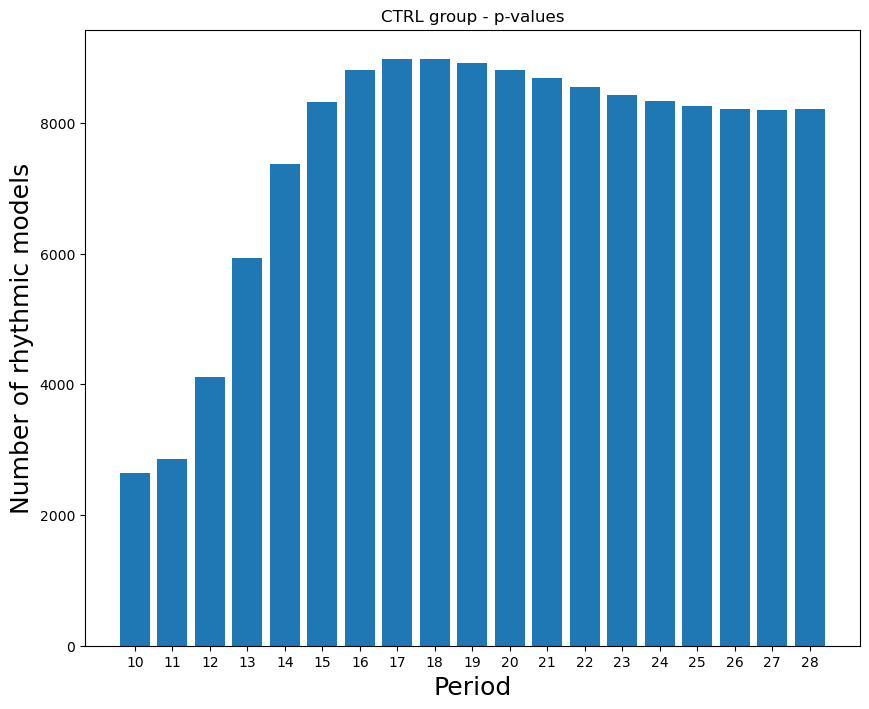

In [36]:
plt.figure(1)
figure(figsize=(10, 8))
labels = rhythm_period_pval["Period"]
counts = rhythm_period_pval["nb_prots_ctrl"]
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_cosinor_ctrl_pval.png', dpi = 300)


Histogram of the significative periodic models for the NLRP3 group and considering p-values

<Figure size 640x480 with 0 Axes>

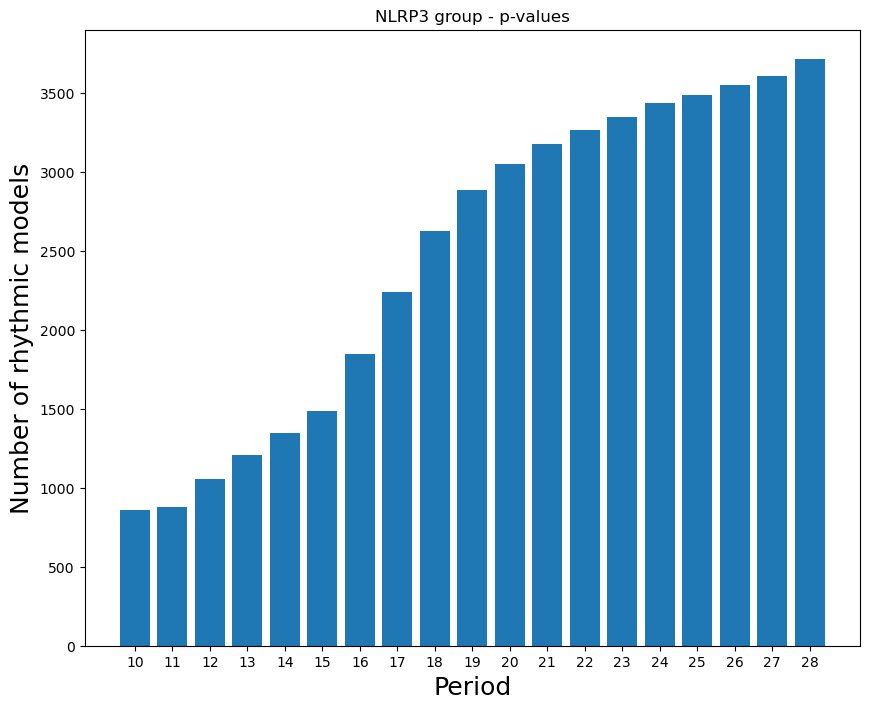

In [37]:
plt.figure(2)
figure(figsize=(10, 8))
labels = rhythm_period_pval["Period"]
counts = rhythm_period_pval["nb_prots_nlrp3"]
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - p-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_cosinor_nlrp3_pval.png', dpi = 300)


## Number of significative periodic models considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_qval"></a>

We store the number of significative models for a given period and we prepare the histogram plot.

In [34]:
rhythm_period_qval = pd.DataFrame({'Period': rhythm_period_mass_spec_qval["Period"],
                                   'nb_prots_ctrl': sum_qval["nb_prots_ctrl"],
                                   'nb_prots_nlrp3':sum_qval["nb_prots_nlrp3"]})
print(rhythm_period_qval.sort_values(by="nb_prots_ctrl"))

    Period  nb_prots_ctrl  nb_prots_nlrp3
0       10            327              77
1       11            458             122
2       12           1240             258
3       13           2839             413
4       14           4233             569
5       15           5367             722
6       16           6090             918
18      28           6432            1813
17      27           6462            1816
16      26           6495            1815
7       17           6504            1189
15      25           6538            1814
14      24           6580            1813
13      23           6626            1814
8       18           6656            1407
12      22           6669            1793
9       19           6703            1572
11      21           6710            1757
10      20           6719            1700


Histogram of the significative periodic models for the CTRL group and considering q-values

<Figure size 640x480 with 0 Axes>

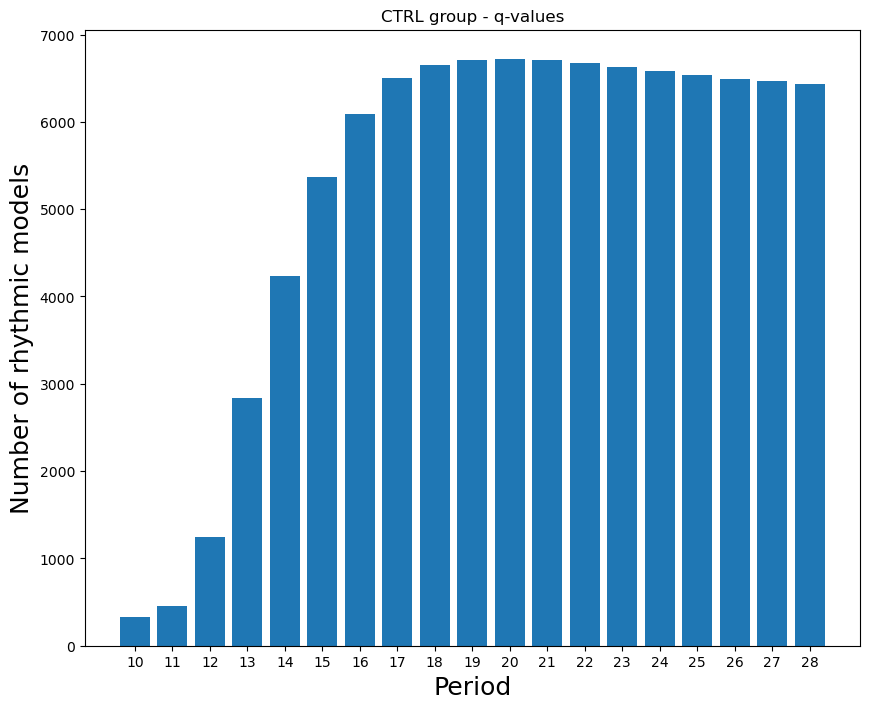

In [38]:
plt.figure(1)
figure(figsize=(10, 8))
labels = rhythm_period_qval['Period']
counts = rhythm_period_qval['nb_prots_ctrl']
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('CTRL group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_cosinor_ctrl_qval.png', dpi = 300)

Histogram of the significative periodic models for the NLRP3 group and considering q-values

<Figure size 640x480 with 0 Axes>

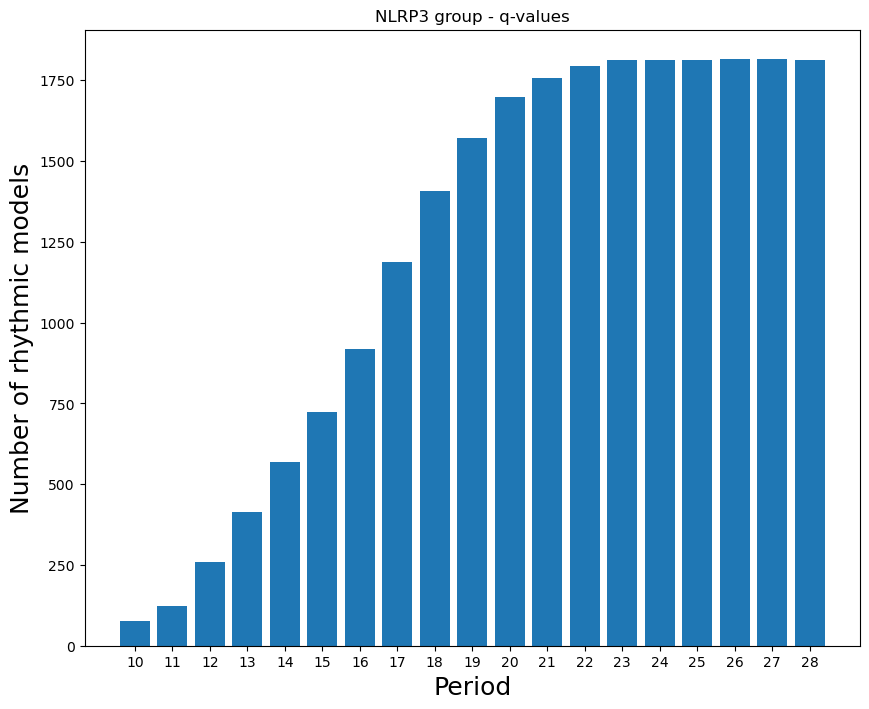

In [40]:
plt.figure(2)
figure(figsize=(10, 8))
labels = rhythm_period_qval['Period'] 
counts = rhythm_period_qval['nb_prots_nlrp3']
plt.bar(labels, counts, align='center')
plt.gca().set_xticks(labels)
plt.title('NLRP3 group - q-values')
plt.ylabel("Number of rhythmic models",fontsize=18)
plt.xlabel("Period",fontsize=18)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Histo_cosinor_nlrp3_qval.png', dpi = 300)


# Number of significative periodic models for a range of thresholds  <a class="anchor" id="nb_rhythmic_proteins_range_threshold"></a>

## Number of significative periodic models for a range of thresholds considering <font color=#B40404> p-values </font> <a class="anchor" id="nb_rhythmic_proteins_range_threshold_pval"></a>

In [ ]:
rhythm_period_10_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_10_pval.csv")
rhythm_period_10_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_10_pval.csv")
rhythm_period_11_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_11_pval.csv")
rhythm_period_11_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_11_pval.csv")
rhythm_period_12_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_12_pval.csv")
rhythm_period_12_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_12_pval.csv")
rhythm_period_13_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_13_pval.csv")
rhythm_period_13_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_13_pval.csv")
rhythm_period_14_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_14_pval.csv")
rhythm_period_14_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_14_pval.csv")
rhythm_period_15_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_15_pval.csv")
rhythm_period_15_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_15_pval.csv")
rhythm_period_16_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_16_pval.csv")
rhythm_period_16_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_16_pval.csv")
rhythm_period_17_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_17_pval.csv")
rhythm_period_17_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_17_pval.csv")
rhythm_period_18_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_18_pval.csv")
rhythm_period_18_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_18_pval.csv")
rhythm_period_19_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_19_pval.csv")
rhythm_period_19_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_19_pval.csv")
rhythm_period_20_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_20_pval.csv")
rhythm_period_20_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_20_pval.csv")
rhythm_period_21_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_21_pval.csv")
rhythm_period_21_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_21_pval.csv")
rhythm_period_22_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_22_pval.csv")
rhythm_period_22_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_22_pval.csv")
rhythm_period_23_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_23_pval.csv")
rhythm_period_23_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_23_pval.csv")
rhythm_period_24_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_24_pval.csv")
rhythm_period_24_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_24_pval.csv")
rhythm_period_25_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_25_pval.csv")
rhythm_period_25_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_25_pval.csv")
rhythm_period_26_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_26_pval.csv")
rhythm_period_26_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_26_pval.csv")
rhythm_period_27_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_27_pval.csv")
rhythm_period_27_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_27_pval.csv")
rhythm_period_28_mass_spec_pval = pd.read_csv("data Mass Spec/rhythm_prots_period_28_pval.csv")
rhythm_period_28_rna_seq_pval = pd.read_csv("data RNA Seq/rhythm_prots_period_28_pval.csv")

sum_period_10 = rhythm_period_10_mass_spec_pval+rhythm_period_10_rna_seq_pval
sum_period_11 = rhythm_period_11_mass_spec_pval+rhythm_period_11_rna_seq_pval
sum_period_12 = rhythm_period_12_mass_spec_pval+rhythm_period_12_rna_seq_pval
sum_period_13 = rhythm_period_13_mass_spec_pval+rhythm_period_13_rna_seq_pval
sum_period_14 = rhythm_period_14_mass_spec_pval+rhythm_period_14_rna_seq_pval
sum_period_15 = rhythm_period_15_mass_spec_pval+rhythm_period_15_rna_seq_pval
sum_period_16 = rhythm_period_16_mass_spec_pval+rhythm_period_16_rna_seq_pval
sum_period_17 = rhythm_period_17_mass_spec_pval+rhythm_period_17_rna_seq_pval
sum_period_18 = rhythm_period_18_mass_spec_pval+rhythm_period_18_rna_seq_pval
sum_period_19 = rhythm_period_19_mass_spec_pval+rhythm_period_19_rna_seq_pval
sum_period_20 = rhythm_period_20_mass_spec_pval+rhythm_period_20_rna_seq_pval
sum_period_21 = rhythm_period_21_mass_spec_pval+rhythm_period_21_rna_seq_pval
sum_period_22 = rhythm_period_22_mass_spec_pval+rhythm_period_22_rna_seq_pval
sum_period_23 = rhythm_period_23_mass_spec_pval+rhythm_period_23_rna_seq_pval
sum_period_24 = rhythm_period_24_mass_spec_pval+rhythm_period_24_rna_seq_pval
sum_period_25 = rhythm_period_25_mass_spec_pval+rhythm_period_25_rna_seq_pval
sum_period_26 = rhythm_period_26_mass_spec_pval+rhythm_period_26_rna_seq_pval
sum_period_27 = rhythm_period_27_mass_spec_pval+rhythm_period_27_rna_seq_pval
sum_period_28 = rhythm_period_28_mass_spec_pval+rhythm_period_28_rna_seq_pval

### CTRL - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

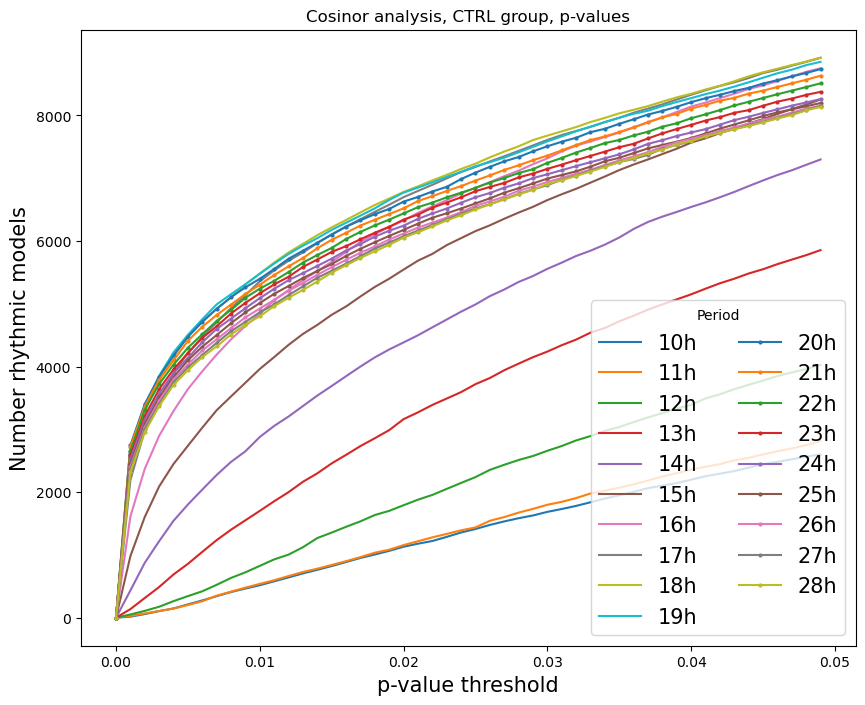

In [46]:
rhythm_prots_period_ctrl = {'pval':[],'nb_prots_ctrl_10':sum_period_10["nb_prots_ctrl"],'nb_prots_ctrl_11':sum_period_11["nb_prots_ctrl"],'nb_prots_ctrl_12':sum_period_12["nb_prots_ctrl"],
                            'nb_prots_ctrl_13':sum_period_13["nb_prots_ctrl"],'nb_prots_ctrl_14':sum_period_14["nb_prots_ctrl"],'nb_prots_ctrl_15':sum_period_15["nb_prots_ctrl"],'nb_prots_ctrl_16':sum_period_16["nb_prots_ctrl"],
                            'nb_prots_ctrl_17':sum_period_17["nb_prots_ctrl"],'nb_prots_ctrl_18':sum_period_18["nb_prots_ctrl"],'nb_prots_ctrl_19':sum_period_19["nb_prots_ctrl"],'nb_prots_ctrl_20':sum_period_20["nb_prots_ctrl"],
                            'nb_prots_ctrl_21':sum_period_21["nb_prots_ctrl"],'nb_prots_ctrl_22':sum_period_22["nb_prots_ctrl"],'nb_prots_ctrl_23':sum_period_23["nb_prots_ctrl"],'nb_prots_ctrl_24':sum_period_24["nb_prots_ctrl"],
                            'nb_prots_ctrl_25':sum_period_25["nb_prots_ctrl"],'nb_prots_ctrl_26':sum_period_26["nb_prots_ctrl"],'nb_prots_ctrl_27':sum_period_27["nb_prots_ctrl"],'nb_prots_ctrl_28':sum_period_28["nb_prots_ctrl"]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_ctrl['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_ctrl.keys()) 
del cols[0]

plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_ctrl['pval'], rhythm_prots_period_ctrl[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, CTRL group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_cosinor_ctrl_pval.png', dpi = 300)

### NLRP3 - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

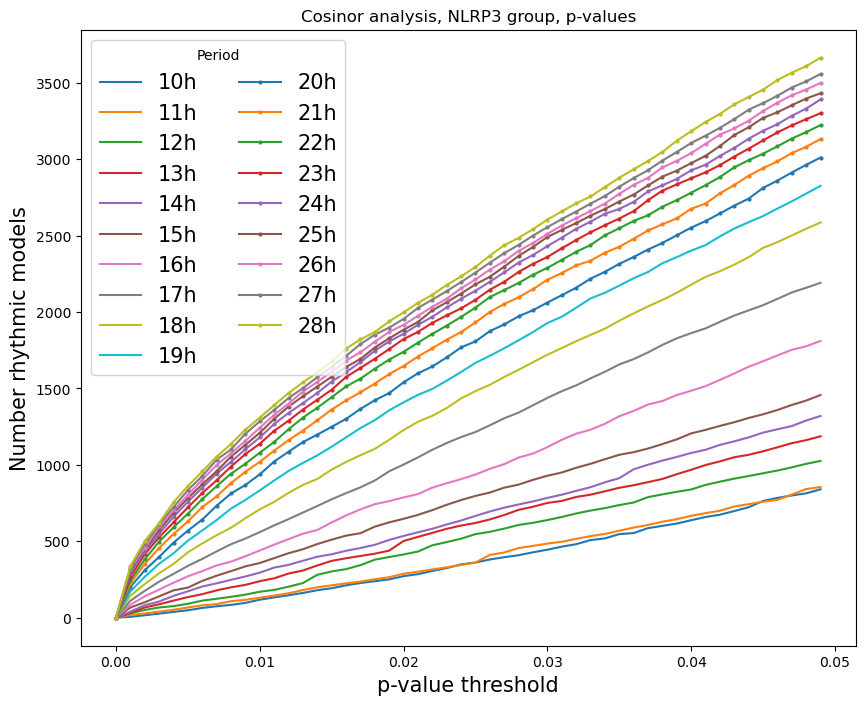

In [48]:
rhythm_prots_period_nlrp3 = {'pval':[],'nb_prots_nlrp3_10':sum_period_10["nb_prots_nlrp3"],'nb_prots_nlrp3_11':sum_period_11["nb_prots_nlrp3"],'nb_prots_nlrp3_12':sum_period_12["nb_prots_nlrp3"],
                            'nb_prots_nlrp3_13':sum_period_13["nb_prots_nlrp3"],'nb_prots_nlrp3_14':sum_period_14["nb_prots_nlrp3"],'nb_prots_nlrp3_15':sum_period_15["nb_prots_nlrp3"],'nb_prots_nlrp3_16':sum_period_16["nb_prots_nlrp3"],
                            'nb_prots_nlrp3_17':sum_period_17["nb_prots_nlrp3"],'nb_prots_nlrp3_18':sum_period_18["nb_prots_nlrp3"],'nb_prots_nlrp3_19':sum_period_19["nb_prots_nlrp3"],'nb_prots_nlrp3_20':sum_period_20["nb_prots_nlrp3"],
                            'nb_prots_nlrp3_21':sum_period_21["nb_prots_nlrp3"],'nb_prots_nlrp3_22':sum_period_22["nb_prots_nlrp3"],'nb_prots_nlrp3_23':sum_period_23["nb_prots_nlrp3"],'nb_prots_nlrp3_24':sum_period_24["nb_prots_nlrp3"],
                            'nb_prots_nlrp3_25':sum_period_25["nb_prots_nlrp3"],'nb_prots_nlrp3_26':sum_period_26["nb_prots_nlrp3"],'nb_prots_nlrp3_27':sum_period_27["nb_prots_nlrp3"],'nb_prots_nlrp3_28':sum_period_28["nb_prots_nlrp3"]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_nlrp3['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_nlrp3.keys()) 
del cols[0]

Range_period = range(10,29)

plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)),cols, Range_period) :
    plt.plot(rhythm_prots_period_nlrp3['pval'], rhythm_prots_period_nlrp3[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, NLRP3 group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_cosinor_nlrp3_pval.png', dpi = 300)


### BOTH - pval
Plot of the number of rhythmic models according to p-value threshold for each period value

<Figure size 640x480 with 0 Axes>

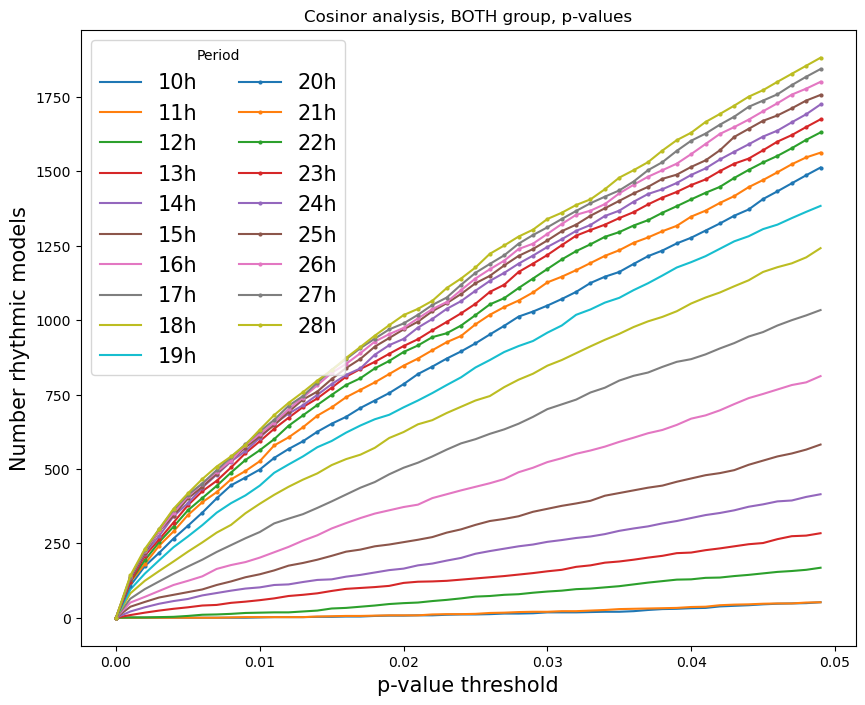

In [50]:
rhythm_prots_period_both = {'pval':[],'nb_prots_both_10':sum_period_10["nb_prots_both"],'nb_prots_both_11':sum_period_11["nb_prots_both"],'nb_prots_both_12':sum_period_12["nb_prots_both"],
                            'nb_prots_both_13':sum_period_13["nb_prots_both"],'nb_prots_both_14':sum_period_14["nb_prots_both"],'nb_prots_both_15':sum_period_15["nb_prots_both"],'nb_prots_both_16':sum_period_16["nb_prots_both"],
                            'nb_prots_both_17':sum_period_17["nb_prots_both"],'nb_prots_both_18':sum_period_18["nb_prots_both"],'nb_prots_both_19':sum_period_19["nb_prots_both"],'nb_prots_both_20':sum_period_20["nb_prots_both"],
                            'nb_prots_both_21':sum_period_21["nb_prots_both"],'nb_prots_both_22':sum_period_22["nb_prots_both"],'nb_prots_both_23':sum_period_23["nb_prots_both"],'nb_prots_both_24':sum_period_24["nb_prots_both"],
                            'nb_prots_both_25':sum_period_25["nb_prots_both"],'nb_prots_both_26':sum_period_26["nb_prots_both"],'nb_prots_both_27':sum_period_27["nb_prots_both"],'nb_prots_both_28':sum_period_28["nb_prots_both"]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_both['pval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_both.keys()) 
del cols[0]

Range_period = range(10,29)

plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_both['pval'], rhythm_prots_period_both[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, BOTH group, p-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("p-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_cosinor_both_pval.png', dpi = 300)


## Number of significative periodic models for a range of thresholds considering <font color=#B40404> q-values </font> <a class="anchor" id="nb_rhythmic_proteins_range_threshold_qval"></a>

In [51]:
rhythm_period_10_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_10_qval.csv")
rhythm_period_10_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_10_qval.csv")
rhythm_period_11_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_11_qval.csv")
rhythm_period_11_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_11_qval.csv")
rhythm_period_12_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_12_qval.csv")
rhythm_period_12_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_12_qval.csv")
rhythm_period_13_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_13_qval.csv")
rhythm_period_13_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_13_qval.csv")
rhythm_period_14_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_14_qval.csv")
rhythm_period_14_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_14_qval.csv")
rhythm_period_15_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_15_qval.csv")
rhythm_period_15_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_15_qval.csv")
rhythm_period_16_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_16_qval.csv")
rhythm_period_16_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_16_qval.csv")
rhythm_period_17_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_17_qval.csv")
rhythm_period_17_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_17_qval.csv")
rhythm_period_18_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_18_qval.csv")
rhythm_period_18_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_18_qval.csv")
rhythm_period_19_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_19_qval.csv")
rhythm_period_19_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_19_qval.csv")
rhythm_period_20_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_20_qval.csv")
rhythm_period_20_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_20_qval.csv")
rhythm_period_21_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_21_qval.csv")
rhythm_period_21_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_21_qval.csv")
rhythm_period_22_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_22_qval.csv")
rhythm_period_22_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_22_qval.csv")
rhythm_period_23_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_23_qval.csv")
rhythm_period_23_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_23_qval.csv")
rhythm_period_24_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_24_qval.csv")
rhythm_period_24_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_24_qval.csv")
rhythm_period_25_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_25_qval.csv")
rhythm_period_25_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_25_qval.csv")
rhythm_period_26_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_26_qval.csv")
rhythm_period_26_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_26_qval.csv")
rhythm_period_27_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_27_qval.csv")
rhythm_period_27_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_27_qval.csv")
rhythm_period_28_mass_spec_qval = pd.read_csv("data Mass Spec/rhythm_prots_period_28_qval.csv")
rhythm_period_28_rna_seq_qval = pd.read_csv("data RNA Seq/rhythm_prots_period_28_qval.csv")

sum_period_10 = rhythm_period_10_mass_spec_qval+rhythm_period_10_rna_seq_qval
sum_period_11 = rhythm_period_11_mass_spec_qval+rhythm_period_11_rna_seq_qval
sum_period_12 = rhythm_period_12_mass_spec_qval+rhythm_period_12_rna_seq_qval
sum_period_13 = rhythm_period_13_mass_spec_qval+rhythm_period_13_rna_seq_qval
sum_period_14 = rhythm_period_14_mass_spec_qval+rhythm_period_14_rna_seq_qval
sum_period_15 = rhythm_period_15_mass_spec_qval+rhythm_period_15_rna_seq_qval
sum_period_16 = rhythm_period_16_mass_spec_qval+rhythm_period_16_rna_seq_qval
sum_period_17 = rhythm_period_17_mass_spec_qval+rhythm_period_17_rna_seq_qval
sum_period_18 = rhythm_period_18_mass_spec_qval+rhythm_period_18_rna_seq_qval
sum_period_19 = rhythm_period_19_mass_spec_qval+rhythm_period_19_rna_seq_qval
sum_period_20 = rhythm_period_20_mass_spec_qval+rhythm_period_20_rna_seq_qval
sum_period_21 = rhythm_period_21_mass_spec_qval+rhythm_period_21_rna_seq_qval
sum_period_22 = rhythm_period_22_mass_spec_qval+rhythm_period_22_rna_seq_qval
sum_period_23 = rhythm_period_23_mass_spec_qval+rhythm_period_23_rna_seq_qval
sum_period_24 = rhythm_period_24_mass_spec_qval+rhythm_period_24_rna_seq_qval
sum_period_25 = rhythm_period_25_mass_spec_qval+rhythm_period_25_rna_seq_qval
sum_period_26 = rhythm_period_26_mass_spec_qval+rhythm_period_26_rna_seq_qval
sum_period_27 = rhythm_period_27_mass_spec_qval+rhythm_period_27_rna_seq_qval
sum_period_28 = rhythm_period_28_mass_spec_qval+rhythm_period_28_rna_seq_qval


### CTRL - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

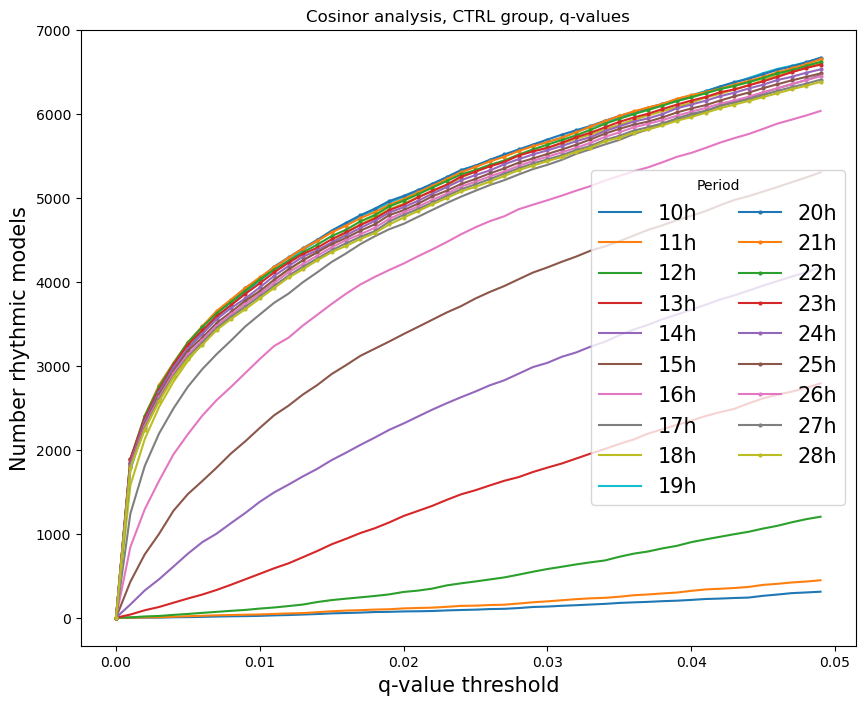

In [52]:
rhythm_prots_period_ctrl = {'qval':[],'nb_prots_ctrl_10':sum_period_10["nb_prots_ctrl"],'nb_prots_ctrl_11':sum_period_11["nb_prots_ctrl"],'nb_prots_ctrl_12':sum_period_12["nb_prots_ctrl"],
                            'nb_prots_ctrl_13':sum_period_13["nb_prots_ctrl"],'nb_prots_ctrl_14':sum_period_14["nb_prots_ctrl"],'nb_prots_ctrl_15':sum_period_15["nb_prots_ctrl"],'nb_prots_ctrl_16':sum_period_16["nb_prots_ctrl"],
                            'nb_prots_ctrl_17':sum_period_17["nb_prots_ctrl"],'nb_prots_ctrl_18':sum_period_18["nb_prots_ctrl"],'nb_prots_ctrl_19':sum_period_19["nb_prots_ctrl"],'nb_prots_ctrl_20':sum_period_20["nb_prots_ctrl"],
                            'nb_prots_ctrl_21':sum_period_21["nb_prots_ctrl"],'nb_prots_ctrl_22':sum_period_22["nb_prots_ctrl"],'nb_prots_ctrl_23':sum_period_23["nb_prots_ctrl"],'nb_prots_ctrl_24':sum_period_24["nb_prots_ctrl"],
                            'nb_prots_ctrl_25':sum_period_25["nb_prots_ctrl"],'nb_prots_ctrl_26':sum_period_26["nb_prots_ctrl"],'nb_prots_ctrl_27':sum_period_27["nb_prots_ctrl"],'nb_prots_ctrl_28':sum_period_28["nb_prots_ctrl"]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_ctrl['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_ctrl.keys()) 
del cols[0]

Range_period = range(10,29)

plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_ctrl['qval'], rhythm_prots_period_ctrl[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, CTRL group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_cosinor_ctrl_qval.png', dpi = 300)

### NLRP3 - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

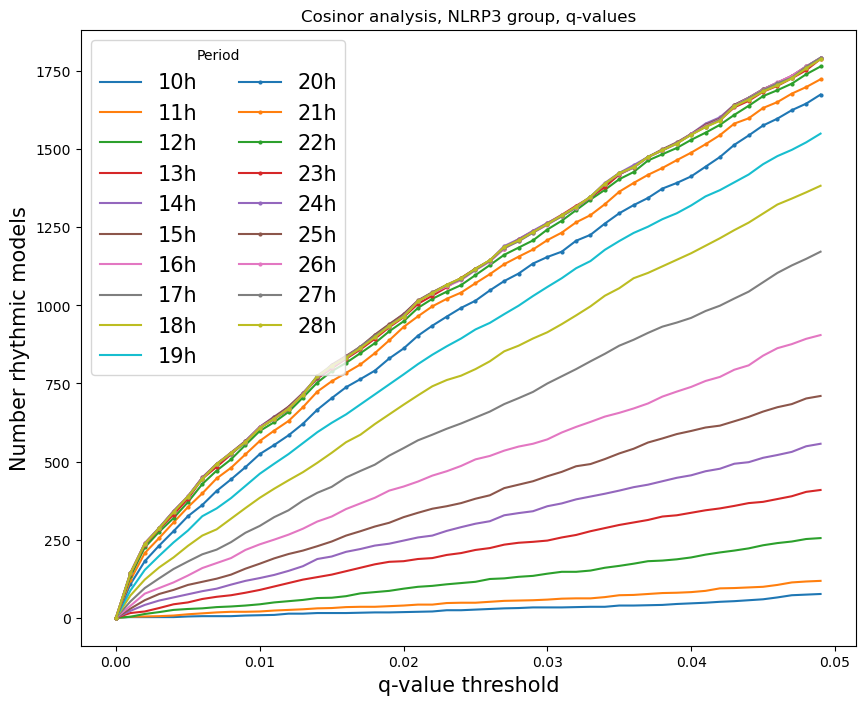

In [53]:
rhythm_prots_period_nlrp3 = {'qval':[],'nb_prots_nlrp3_10':sum_period_10["nb_prots_nlrp3"],'nb_prots_nlrp3_11':sum_period_11["nb_prots_nlrp3"],'nb_prots_nlrp3_12':sum_period_12["nb_prots_nlrp3"],
                            'nb_prots_nlrp3_13':sum_period_13["nb_prots_nlrp3"],'nb_prots_nlrp3_14':sum_period_14["nb_prots_nlrp3"],'nb_prots_nlrp3_15':sum_period_15["nb_prots_nlrp3"],'nb_prots_nlrp3_16':sum_period_16["nb_prots_nlrp3"],
                            'nb_prots_nlrp3_17':sum_period_17["nb_prots_nlrp3"],'nb_prots_nlrp3_18':sum_period_18["nb_prots_nlrp3"],'nb_prots_nlrp3_19':sum_period_19["nb_prots_nlrp3"],'nb_prots_nlrp3_20':sum_period_20["nb_prots_nlrp3"],
                            'nb_prots_nlrp3_21':sum_period_21["nb_prots_nlrp3"],'nb_prots_nlrp3_22':sum_period_22["nb_prots_nlrp3"],'nb_prots_nlrp3_23':sum_period_23["nb_prots_nlrp3"],'nb_prots_nlrp3_24':sum_period_24["nb_prots_nlrp3"],
                            'nb_prots_nlrp3_25':sum_period_25["nb_prots_nlrp3"],'nb_prots_nlrp3_26':sum_period_26["nb_prots_nlrp3"],'nb_prots_nlrp3_27':sum_period_27["nb_prots_nlrp3"],'nb_prots_nlrp3_28':sum_period_28["nb_prots_nlrp3"]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_nlrp3['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_nlrp3.keys()) 
del cols[0]

Range_period = range(10,29)

plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_nlrp3['qval'], rhythm_prots_period_nlrp3[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, NLRP3 group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_cosinor_nlrp3_qval.png', dpi = 300)


### BOTH - qval
Plot of the number of rhythmic models according to q-value threshold for each period value

<Figure size 640x480 with 0 Axes>

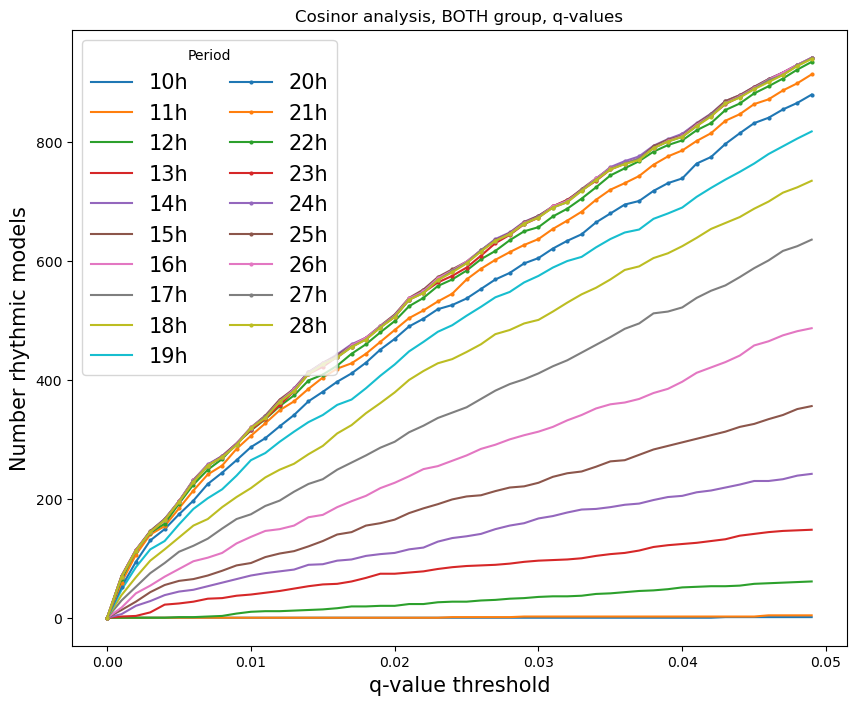

In [36]:
rhythm_prots_period_both = {'qval':[],'nb_prots_both_10':sum_period_10["nb_prots_both"],'nb_prots_both_11':sum_period_11["nb_prots_both"],'nb_prots_both_12':sum_period_12["nb_prots_both"],
                            'nb_prots_both_13':sum_period_13["nb_prots_both"],'nb_prots_both_14':sum_period_14["nb_prots_both"],'nb_prots_both_15':sum_period_15["nb_prots_both"],'nb_prots_both_16':sum_period_16["nb_prots_both"],
                            'nb_prots_both_17':sum_period_17["nb_prots_both"],'nb_prots_both_18':sum_period_18["nb_prots_both"],'nb_prots_both_19':sum_period_19["nb_prots_both"],'nb_prots_both_20':sum_period_20["nb_prots_both"],
                            'nb_prots_both_21':sum_period_21["nb_prots_both"],'nb_prots_both_22':sum_period_22["nb_prots_both"],'nb_prots_both_23':sum_period_23["nb_prots_both"],'nb_prots_both_24':sum_period_24["nb_prots_both"],
                            'nb_prots_both_25':sum_period_25["nb_prots_both"],'nb_prots_both_26':sum_period_26["nb_prots_both"],'nb_prots_both_27':sum_period_27["nb_prots_both"],'nb_prots_both_28':sum_period_28["nb_prots_both"]
                           }

markers = [" "," "," "," "," "," "," "," "," "," ","o","o","o","o","o","o","o","o","o"]

rhythm_prots_period_both['qval'] = np.arange(0,0.06,0.001)
cols = list(rhythm_prots_period_both.keys()) 
del cols[0]

Range_period = range(10,29)

plt.figure(1)
figure(figsize=(10, 8))
for idx, column, period in zip(range(len(Range_period)), cols, Range_period) :
    plt.plot(rhythm_prots_period_both['qval'], rhythm_prots_period_both[column],marker = markers[idx],markersize=2, label =str(period)+'h')
plt.legend(title="Period",fontsize=15,ncol=2)
plt.title('Cosinor analysis, BOTH group, q-values')
plt.ylabel("Number rhythmic models",fontsize=15)
plt.xlabel("q-value threshold",fontsize=15)
save_results_to = 'Results/'
plt.savefig(save_results_to + 'Nb_rhythmic_models_cosinor_both_qval.png', dpi = 300)
